# 05 - Sistema de Coordenadas

Para essa atividade vamos usar o Numpy e Matplotlib. Assim vamos carregar as bibliotecas.

In [1]:
import numpy
import matplotlib.pyplot as plt

Vamos começar essa atividade no espaço 2D. Vamos criar assim algumas funções auxiliares que permitam já configurar um gráfico 2D e desenhar um quadrado em função de suas coordenadas.

In [2]:
# Faz o setup para desenhar gráficos
def graph():
    fig = plt.figure()
    ax = plt.axes()
    plt.grid()
    ax.set_xlim(-2, 5)
    ax.set_ylim(-2, 5)
    ax.axhline(0, color='black') # deixa o X do eixo 0 em destaque
    ax.axvline(0, color='black') # deixa o Y do eixo 0 em destaque
    #ax.set_aspect('equal') # Não suportado em todas as plataformas
    ax.set(xlabel='x', ylabel='y')
    fig.tight_layout()
    return ax

# Desenha um quadrado a partir dos vértices e cor fornecida
def draw_square(points, color="red"):
    plt.scatter(points[0], points[1], s=20, color=color)
    patch = plt.Polygon(points.transpose()[:,0:2], color=color)
    plt.gca().add_patch(patch)

## Transformações Inversas

Vamos começar desenhando um quadrado em 2D pelos seus 4 vértices.

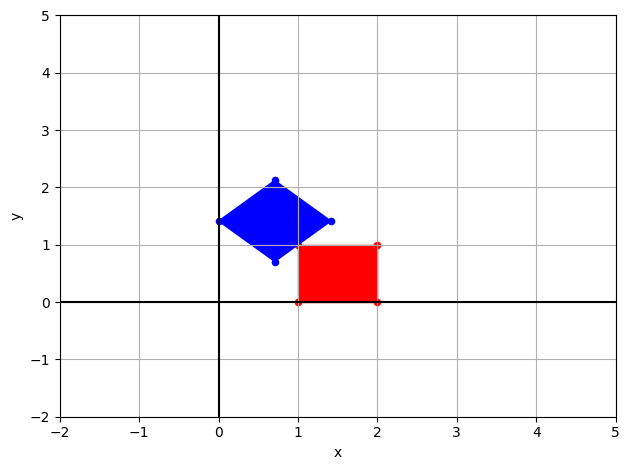

In [18]:
ax = graph() # configura o espaço para desenhar um gráfico 2D

# Pontos originais do vértice de um quadrado exemplo
p_quadrado = numpy.array([[1.0, 2.0, 2.0, 1.0],
                          [0.0, 0.0, 1.0, 1.0]])

# Desenha o quadrado
draw_square(p_quadrado, "red")

# Prepara uma matriz de rotação e aplica nos pontos
angle = numpy.radians(45)
Mrot45 = numpy.array([[numpy.cos(angle), -numpy.sin(angle)],
                    [numpy.sin(angle),  numpy.cos(angle)]])
p_quadrado_rot = numpy.matmul(Mrot45, p_quadrado)

# Desenha o quadrado com os vértice rotacionados
draw_square(p_quadrado_rot, "blue")

plt.show()

A matriz de rotação (Mrot45) criada acima faz uma rotação de 45° no sentido anti-horário, queremos agora voltar o quadrado (seus vértices) para a posição original. Assim, somente usando a matriz de rotação (Mrot45) e os pontos já rotacionados (p_quadrado_rot), crie uma nova matriz que faça os pontos voltarem para a posição original. A proposta dessa atividade é que saiba reverter uma trasnformação (e não aplicar os senos e cossenos para fazer uma nova matriz de rotação no sentido inverso).

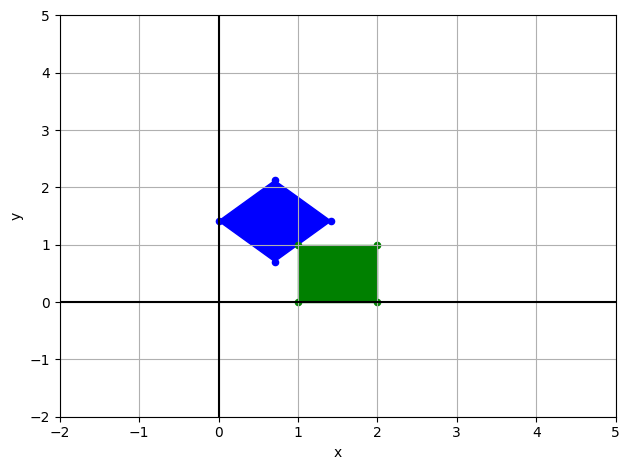

In [19]:
ax = graph() # configura o espaço para desenhar um gráfico 2D

draw_square(p_quadrado_rot, "blue")

# FAÇA AQUI SUA IMPLEMENTAÇÃO
MrotInverse = numpy.linalg.inv(Mrot45)

p_quadrado_rot_copy = MrotInverse @ p_quadrado_rot.copy()

draw_square(p_quadrado_rot_copy, "green")

plt.show()

## Mudança de base

Vamos fazer agora uma mudança de base. Abaixo está um quadrado na base original.

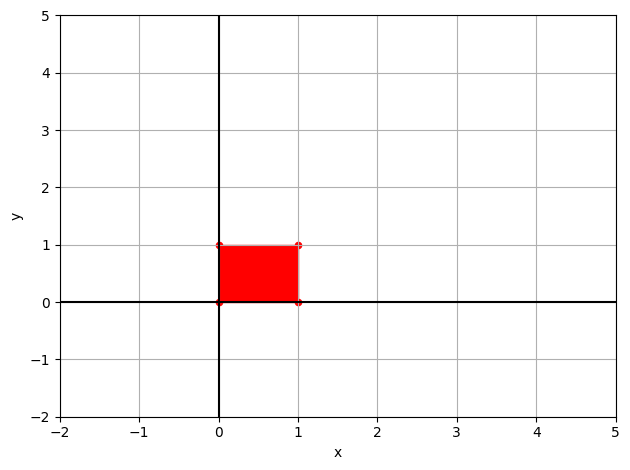

In [51]:
ax = graph() # configura o espaço para desenhar um gráfico 2D

# Pontos originais do vértice de um quadrado exemplo
p_quadrado = numpy.array([[0.0, 1.0, 1.0, 0.0],
                          [0.0, 0.0, 1.0, 1.0]])

# Desenhando o quadrado
draw_square(p_quadrado, "red")

plt.show()

Leve esse quadrado para uma nova base com origem no (1,1) e vetores u e v respectivamente ($\frac{\sqrt{2}}{2}$, $\frac{\sqrt{2}}{2}$) e (0,-2).

! Para esse exemplo você vai quere usar coordenadas homogêneas.

/tmp/ipykernel_21367/1756058323.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  square.append([float(p[0]), float(p[1])])


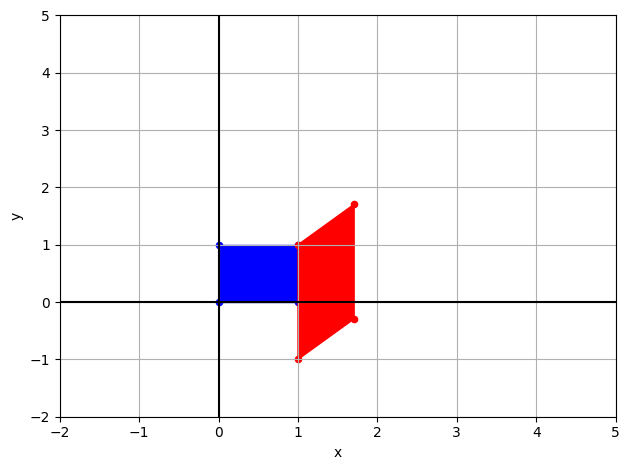

In [53]:
ax = graph()

o = [1, 1]
u = [numpy.sqrt(2)/2, numpy.sqrt(2)/2]
v = [0, -2]

t_matrix = numpy.array([
    [u[0], v[0], o[0]],
    [u[1], v[1], o[1]],
    [0, 0, 1]
])

p_quadrado = numpy.array([[0.0, 1.0, 1.0, 0.0],
                          [0.0, 0.0, 1.0, 1.0]])

square = []
for i in range(p_quadrado.shape[1]):
    x = p_quadrado[0, i]
    y = p_quadrado[1, i]
    p = numpy.array([[x], [y], [1]])
    p = t_matrix @ p
    square.append([float(p[0]), float(p[1])])

square = numpy.array(square).T

draw_square(p_quadrado, "blue")
draw_square(square, "red")

plt.show()

## Rotações 3D (Quatérnios)

Vamos ver agora operações no espaço 3D para tratar o nosso mundo de uma câmera no espaço. Para começar vamos criar as funções auxiliares para o espaço 3D.

In [54]:
# Faz o setup para desenhar gráficos em 3D
def graph3d(c = 1.0):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    ax.set_xlim3d(-4, 4)  # faixa de visualização de X
    ax.set_ylim3d(-4, 4)  # faixa de visualização de Y
    ax.set_zlim3d(-4, 4)  # faixa de visualização de Z
    ax.set_aspect('equal')
    ax.quiver([-c/2,0,0],[0,-c/2,0],[0,0,-c/2],
              [c,0,0],[0,c,0],[0,0,c],
              arrow_length_ratio=0.2, color="grey")
    fig.tight_layout()
    ax.view_init(elev=20.0, azim=30.0,  vertical_axis='y')
    return ax

Vamos fazer uma rotação com quatérnios usando o exemplo fornecido. Assim, crie uma função que recebe o eixo que se deseja rotacionar bem como o ângulo desejado (em radianos) e retorne uma matriz homogênea [4x4] que faça a rotação desejada em pontos no espaço.

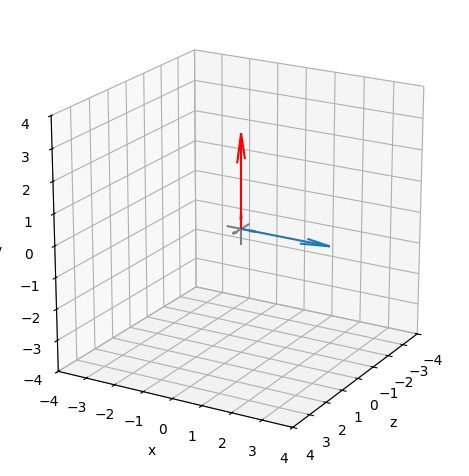

In [73]:
import math

#%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D

vetor = numpy.array([3, 0, 0])
# Para a operação você vai possivelmente mudar para coordenadas homogêneas

# Desenha vetor exemplo
ax.quiver(0, 0, 0, *vetor)

# FAÇA AQUI SUA IMPLEMENTAÇÃO

def quaternion_rotation_matrix(x: float, y: float, z: float, t: float):
    """
    A função quaternion_rotation_matrix usa 
    eixo da rotação (x, y, z), em conjunto 
    com o valor em radianos para theta
    para criar a matriz de rotação.
    """

    def generate_quaternion(x: float, y: float, z: float, theta: float):
        """
        A função generate_quaternion usa o 
        eixo da rotação (x, y, z) em conjunto
        com o valor em radianos para theta
        para criar o quatérnio que irá compor a 
        matriz de rotação.

        um quatérnio [qi, qj, qk, qr] é, na
        prática, o vetor [
            ux*sin(theta/2),
            uy*sin(theta/2),
            uz*sin(theta/2),
            cos(theta/2)
        ]

        sendo ux, uy e uz os versores do eixo
        (vetor [x, y, z] divido pela norma). 
        """
        vector = numpy.array([x, y, z])
        norm = numpy.linalg.norm(vector)

        # se a norma do vetor é zero, não
        # há rotação, e o se usa o quatérnio 1,
        # equivalente a identidade.
        if norm == 0:
            return (0, 0, 0, 1)
        
        normalized_vector = vector / norm
        ux, uy, uz = normalized_vector

        return (
            ux * math.sin(theta/2),
            uy * math.sin(theta/2),
            uz * math.sin(theta/2),
            math.cos(theta/2)
        )
    
    qi, qj, qk, qr = generate_quaternion(x, y, z, t)
    
    return numpy.array([
        [1 - 2*(qj**2 + qk**2), 2*(qi*qj - qk*qr), 2*(qi*qk + qj*qr), 0],
        [2*(qi*qj + qk*qr), 1 - 2*(qi**2 + qk**2), 2*(qj*qk - qi*qr), 0],
        [2*(qi*qk - qj*qr), 2*(qj*qk + qi*qr), 1 - 2*(qi**2 + qj**2), 0],
        [0, 0, 0, 1]
    ])

vetor = numpy.array([3, 0, 0, 1]).T
theta = math.radians(90)

t_matrix = quaternion_rotation_matrix(0, 0, 1, theta)

vetor_rot = t_matrix @ vetor

# Desenha vetor exemplo rotacionado
ax.quiver(0, 0, 0, *vetor_rot[:3], color="red")

plt.show()

A função de LookAt serve para ajustar os objetos na cena em função de uma câmera a ser centralizada e reorientada. Use como exemplo uma câmera posicionada nas coordenadas (2, 1, 0) e que rotacionamos 45 graus no sentido horário em Y para que ela fique olhando um objeto a frente dela.

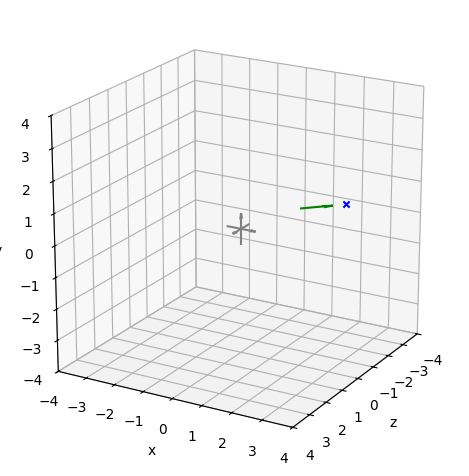

In [74]:
#%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D

# Câmera
pos_camera = numpy.array([2.0, 1.0, 0.0])

# ângulo de rotação
angle = numpy.radians(-45)

# rotaciona 45 graus no eixo Y
Mrot45 = numpy.array([[numpy.cos(angle), 0, numpy.sin(angle), 0],
                      [0, 1, 0, 0],
                      [-numpy.sin(angle), 0, numpy.cos(angle), 0],
                      [0, 0, 0, 1]])

# direção padrão da câmera sendo ajustada
dir_camera = numpy.array([0.0, 0.0, -1.0, 0.0])
dir_camera = numpy.matmul(Mrot45, dir_camera.transpose()).transpose()

# desenhando vetor da câmera
ax.quiver(*pos_camera[:3], *dir_camera[:3], color="green")

# Objeto
pos_objeto = numpy.array([3.0, 1.0, -1.0])
ax.scatter(*pos_objeto[:3], color='blue', s=20, marker = "x")

plt.show()

Desenvolva uma função muito simples de lookat.

Crie e aplique uma função lookAt que receba a posição e orientação da câmera (em radianos) e gere a matriz que fará os objetos aparecer como se a câmera estivesse na posição (0,0,0) olhando para o Z negativo.

!Dica: se você fizer de forma correta a atividade, o ponto deverá aparecer um pouco a frente da coordenada (0,0,-1).

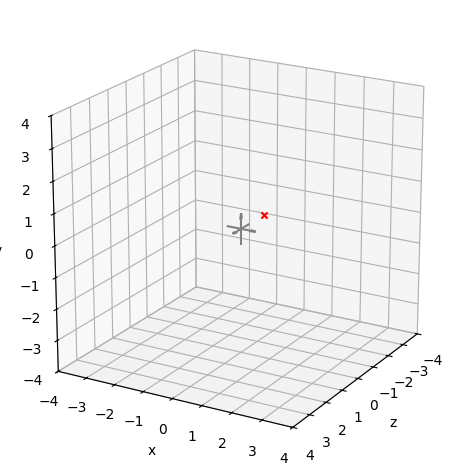

In [83]:
#%matplotlib widget
ax = graph3d() # configura o espaço para desenhar um gráfico 3D

pos_camera = numpy.array([2.0, 1.0, 0.0])

# ângulo de rotação
angle = numpy.radians(-45)

# direção padrão da câmera sendo ajustada
dir_camera = numpy.array([0.0, 0.0, -1.0, 0.0])

# Objeto
pos_objeto = numpy.array([3.0, 1.0, -1.0])

# FAÇA AQUI SUA IMPLEMENTAÇÃO

def lookAt(eye, target, up):
    f = target - eye
    f = f / numpy.linalg.norm(f)
    s = numpy.cross(f, up)
    s = s / numpy.linalg.norm(s)
    u = numpy.cross(s, f)
    M = numpy.eye(4, dtype=float)
    M[0,0:3] = s
    M[1,0:3] = u
    M[2,0:3] = -f
    M[0,3] = -numpy.dot(s, eye)
    M[1,3] = -numpy.dot(u, eye)
    M[2,3] = numpy.dot(f, eye)
    return M

R = quaternion_rotation_matrix(0, 1, 0, angle)
f = (R @ dir_camera)[:3]
f = f / numpy.linalg.norm(f)
target = pos_camera + f
view = lookAt(pos_camera, target, numpy.array([0,1,0]))
p_camera = view @ numpy.array([*pos_objeto, 1.0])

ax.scatter(*p_camera[:3], color='red', s=20, marker = "x")

plt.show()